In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 43 - Neural Network

### 비선형 데이터 셋

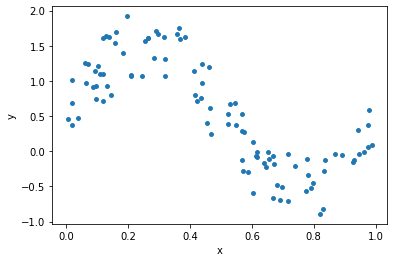

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)  # Add noise

plt.scatter(x, y, s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 신경망 구현

In [3]:
import numpy as np
from dezero import Variable as v
import dezero.functions as F

# data set
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)  # Add noise

# weight initialization
input_dim , hidden_dim , output_dim = 1, 10, 1
W1 = v(0.01 * np.random.randn(input_dim, hidden_dim))
b1 = v(np.zeros(hidden_dim))
W2 = v(0.01 * np.random.randn(hidden_dim, output_dim))
b2 = v(np.zeros(output_dim))

# neural network inference
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000
y_pred = None

# train 
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.24759485466749878)
variable(0.23786120447054837)
variable(0.21222231333102975)
variable(0.16742181117834257)
variable(0.0968193261999275)
variable(0.07849528290602342)
variable(0.07749729552991162)
variable(0.07722132399559321)


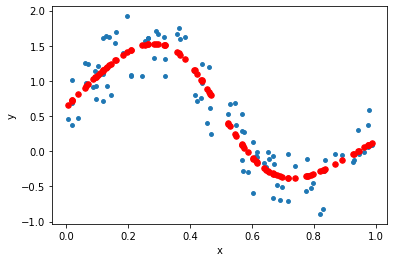

In [20]:
plt.scatter(x, y, s=15)
plt.scatter(x, predict(x).data, c='r', s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()